In [3]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
coordinates = ["jacobi","whds","democraticheliocentric","barycentric"]
dt = 1e-3
n_orbits = 20
times = np.arange(0, n_orbits*(2*np.pi), dt)
errors = np.zeros((len(coordinates),len(times)))
x = np.zeros((len(coordinates),2,len(times)))
y = np.zeros((len(coordinates),2,len(times)))
for c, coord in enumerate(coordinates):
    print(f"Iteration: {c+1}/{len(coordinates)}")
    sim = rebound.Simulation()
    #sim.widget(size=(800,800))
    sim.integrator = "whfast"
    sim.ri_whfast.coordinates = coord
    # sim.add(m=0.5,x=1,vy=0.4)
    # sim.add(m=0.5,x=-1,vy=-0.4)
    sim.add(["Sun","Jupiter","Saturn","Uranus", "Neptune"])
    sim.move_to_com()
    sim.dt = dt
    ei = sim.energy()
    for t,time in enumerate(times):
        sim.integrate(t)
        errors[c,t] = np.abs((sim.energy() - ei)/ei)
        x[c,0,t] = sim.particles[0].x
        x[c,1,t] = sim.particles[1].x
        y[c,0,t] = sim.particles[0].y
        y[c,1,t] = sim.particles[1].y

Iteration: 1/4
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Iteration: 2/4
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Iteration: 3/4
Searching NASA Horizons for 'Sun'... 
Fou

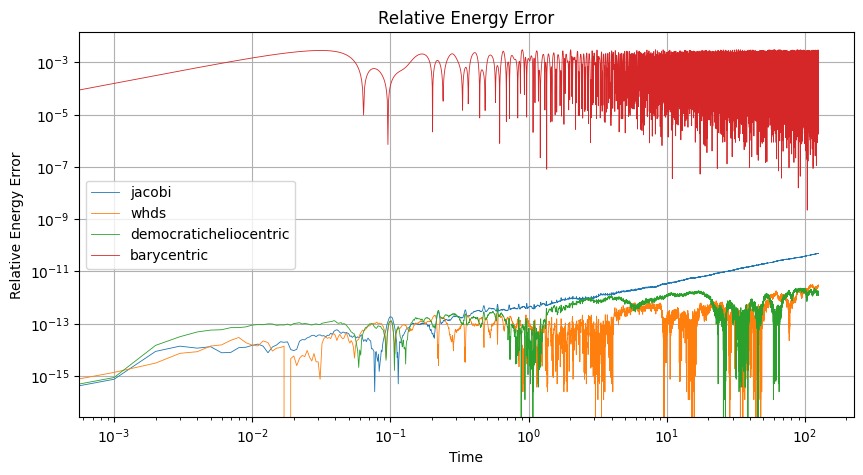

In [4]:
fig = plt.figure(figsize=(10,5))
[plt.plot(times, errors[i], label=coordinates[i],lw=0.6) for i in range(len(coordinates))]
plt.title("Relative Energy Error")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Time")
plt.ylabel("Relative Energy Error")
plt.legend()
plt.grid()
plt.show()

# fig = plt.figure(figsize=(10,5))
# plt.grid()
# plt.xlim(-5,5)
# plt.ylim(-5,5)
# colors=["blue","red","green","orange"]
# for c, coord in enumerate(coordinates):
#     plt.scatter(x[c,0],y[c,0],label=coord,color=colors[c],s=0.001)
#     plt.scatter(x[c,1],y[c,1],label=coord,color=colors[c],s=0.001)
# plt.legend()


In [2]:
# Check error from transformations
import rebound
import ctypes
import numpy as np
import matplotlib.pyplot as plt
n_bodies = 5
def get_particle_properties(sim):
    properties = np.zeros((sim.N,6))
    for i,p in enumerate(sim.particles):
        properties[i] = [p.x,p.y,p.z,p.vx,p.vy,p.vz]
    return properties

def transformation_error(coordinates,n_transforms):
    errors = np.zeros((len(coordinates),n_transforms,n_bodies,6))
    for c, coordinate in enumerate(coordinates):
        sim = rebound.Simulation()
        sim.add(["Sun","Jupiter","Saturn","Uranus", "Neptune"])
        # sim.add(m=1.2354)
        # sim.add(m=0.1,a=1.24,e=0.123,inc=0.14,omega=0.12,Omega=0.64,l=0.632)
        # sim.add(m=0.01,a=5.24,e=0.2123,inc=0.014,omega=0.012,Omega=0.0164,l=10.18632)
        # sim.add(m=1e-7,a=7.24,e=0.22123,inc=0.3014,omega=0.4012,Omega=0.110164,l=2.18632)
        elems = (rebound.Particle * sim.N)()
        p = ctypes.cast(elems,ctypes.POINTER(rebound.Particle))
        cl = rebound.clibrebound
        transform_from_inertial = getattr(cl,f"reb_particles_transform_inertial_to_{coordinate}_posvel")
        transform_to_inertial = getattr(cl,f"reb_particles_transform_{coordinate}_to_inertial_posvel")
        p0 = get_particle_properties(sim)
        for t in range(n_transforms):
            if coordinate == "jacobi":
                transform_from_inertial(sim._particles,p,sim._particles,sim.N,sim.N)
                transform_to_inertial(sim._particles,p,sim._particles,sim.N,sim.N)
            else:
                transform_from_inertial(sim._particles,p,sim.N,sim.N)
                transform_to_inertial(sim._particles,p,sim.N,sim.N)
            # if coordinate == "barycentric":
            #     print(get_particle_properties(sim))
            #     print("-----------------")
            errors[c,t] = np.abs((get_particle_properties(sim)-p0)/p0)
    return errors

coords = ["whds","barycentric","jacobi","democraticheliocentric"]
n_transforms = 2*10**6
errors = transformation_error(coords,n_transforms)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Ju

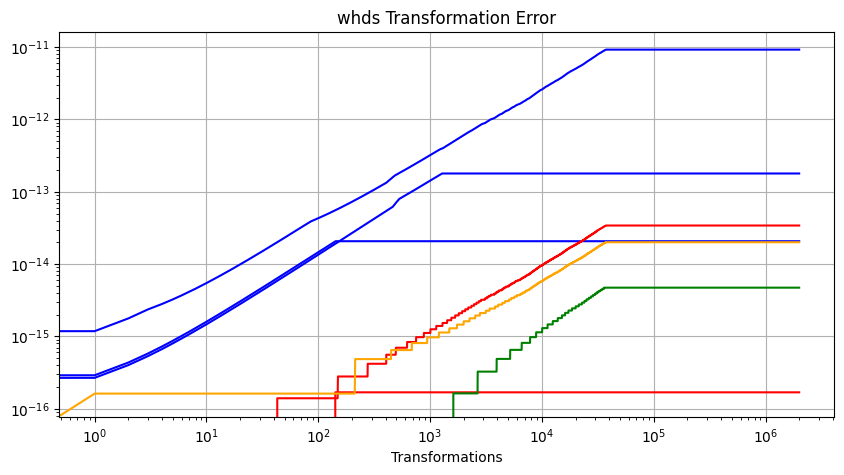

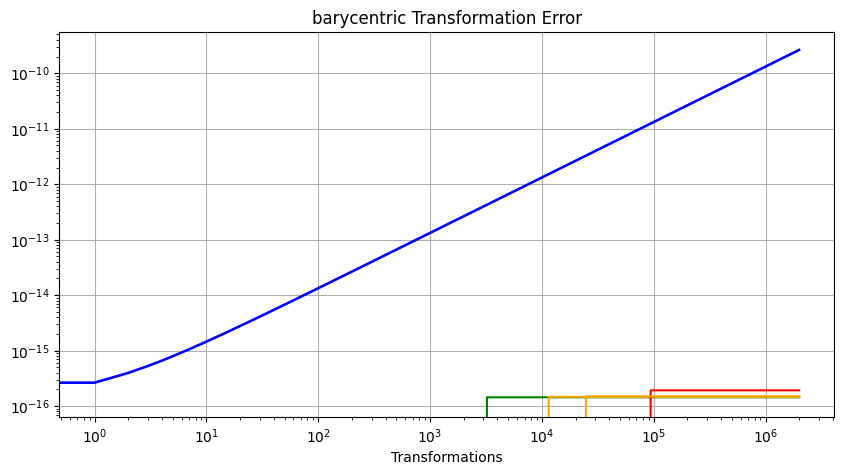

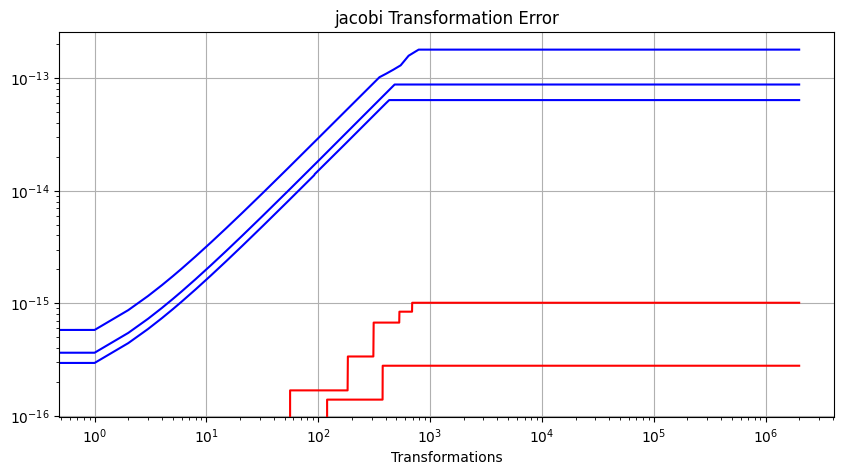

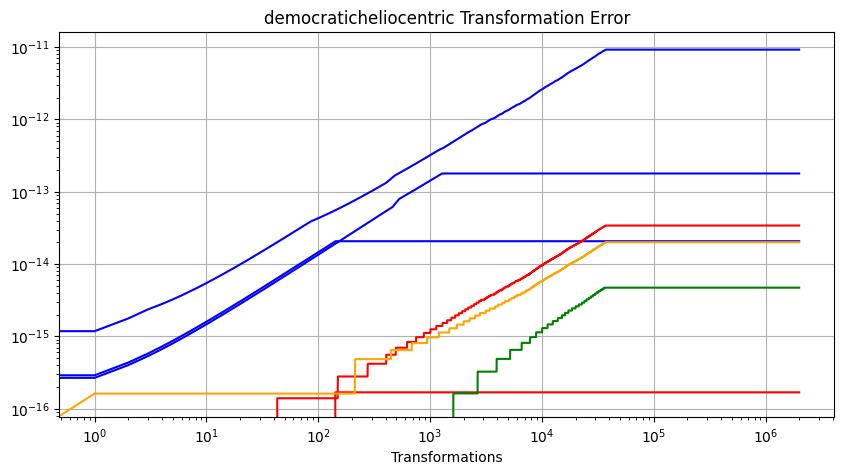

In [3]:
for c, coord in enumerate(coords):
    fig = plt.figure(figsize=(10,5))
    plt.title(f"{coord} Transformation Error")
    plt.xlabel("Transformations")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    for i in range(6):
        plt.plot(range(n_transforms),errors[c,:,0,i],label=f"Particle 0",color="blue")
        plt.plot(range(n_transforms),errors[c,:,1,i],label=f"Particle 1",color="red")
        plt.plot(range(n_transforms),errors[c,:,2,i],label=f"Particle 2",color="green")
        plt.plot(range(n_transforms),errors[c,:,3,i],label=f"Particle 3",color="orange")
    plt.show()

In [4]:
properties = ["x","y","z","vx","vy","vz"]
for c, coord in enumerate(coords):
    print("----------------------------")
    print(f"Coordinate: {coord}")
    for i in range(6):
        print(properties[i], errors[c,:,0,i])

----------------------------
Coordinate: whds
x [1.44875583e-16 2.89751166e-16 4.34626748e-16 ... 2.07172083e-14
 2.07172083e-14 2.07172083e-14]
y [0. 0. 0. ... 0. 0. 0.]
z [5.90302606e-16 1.18060521e-15 1.77090782e-15 ... 9.25461668e-12
 9.25461668e-12 9.25461668e-12]
vx [1.33439183e-16 2.66878366e-16 4.00317548e-16 ... 1.79075383e-13
 1.79075383e-13 1.79075383e-13]
vy [0. 0. 0. ... 0. 0. 0.]
vz [0. 0. 0. ... 0. 0. 0.]
----------------------------
Coordinate: barycentric
x [0. 0. 0. ... 0. 0. 0.]
y [0. 0. 0. ... 0. 0. 0.]
z [0. 0. 0. ... 0. 0. 0.]
vx [1.33439183e-16 2.66878366e-16 4.00317548e-16 ... 2.66878099e-10
 2.66878232e-10 2.66878366e-10]
vy [0. 0. 0. ... 0. 0. 0.]
vz [1.30640651e-16 2.61281302e-16 3.91921953e-16 ... 2.61280779e-10
 2.61280910e-10 2.61281041e-10]
----------------------------
Coordinate: jacobi
x [2.89751166e-16 5.79502331e-16 8.69253497e-16 ... 1.78921345e-13
 1.78921345e-13 1.78921345e-13]
y [1.81845982e-16 3.63691965e-16 5.45537947e-16 ... 8.76497635e-14
 8.7